In [ ]:
TASK-2 : MOVIE RATING PREDICTION

Author : VISHRUT VERMA
Batch : JULY Batch 4
Domain : Data Science
Language : Python
Aim : Build a model that predicts the rating of a movie based on features like genre, director, and actors.

*IMPORTING* *PYTHON* *LIBRARIES*





In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

*DOWNLOADING* *DATASETS*

In [89]:
data= pd.read_csv("/content/IMDb Movies India.csv", encoding='latin-1')
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [22]:
data.shape

(15509, 10)

In [28]:
data.describe(include=['object'])

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


**DATA** **CLEANING**

In [43]:
data.dropna(subset=['Rating'],inplace= True)

In [44]:
data.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [40]:
data.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace= True)

In [45]:
data.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [31]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [46]:
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


**Convert Votes to Integer, Remove Commas, Convert Year (2019) to 2019 and Remove Min from Duration Column**

In [47]:
# Convert Year Columns
data['Year'] = data['Year'].str.strip('()').astype(int)


In [49]:
# Convert Votes column
data['Votes'] = data['Votes'].str.replace(',','').astype(int)

In [50]:
# Convert Duration Columns
data['Duration'] = data['Duration'].str.strip('min')

In [51]:
data['Duration'].fillna(data['Duration'].median(), inplace=True)

In [52]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   object 
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 649.5+ KB


In [54]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Now data are clean and inputed

**Now, Comes to EDA (Exploratory data Analysis)**

In [58]:
# find top 10 movies based on rating
top_movie = data.loc[data['Rating'].sort_values(ascending=False)[:5].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,135.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar


Distribution of Top 5 movies wrt Year

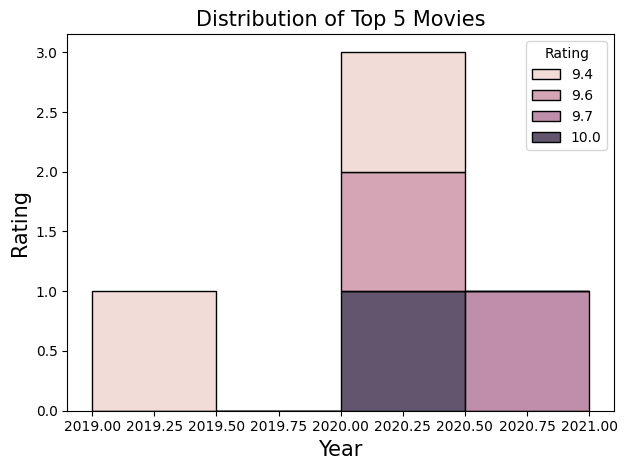

In [59]:
sns.histplot(data=top_movie, x="Year",hue="Rating", multiple="stack")
plt.title('Distribution of Top 5 Movies', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Rating', fontsize=15)
plt.tight_layout()
plt.show()


**Distribution of Top directors by average rating**

In [61]:
# Group the data by director and calculate the average rating
director_avg_rating =data.groupby('Director')['Rating'].mean().reset_index()
director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)

top_directors = director_avg_rating.head(5)
top_directors

,Director,Rating
2243,Saif Ali Sayeed,10.0
2560,Sriram Raja,9.7
504,Bobby Kumar,9.6
322,Arvind Pratap,9.4
1513,Munni Pankaj,9.4


<ipython-input-65-6d6740b8d60f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')


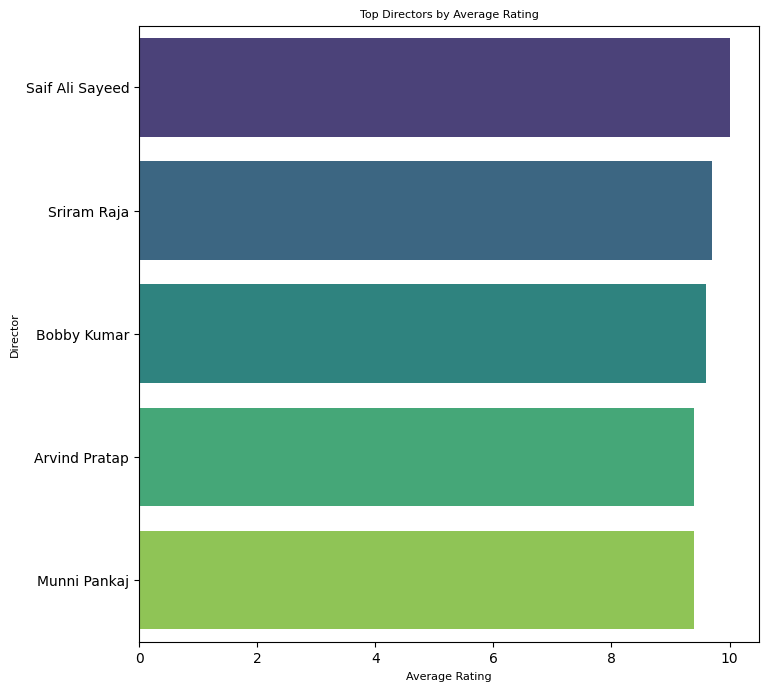

In [65]:
plt.figure(figsize=(8, 8))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')

plt.title('Top Directors by Average Rating', fontsize=8)
plt.xlabel('Average Rating', fontsize=8)
plt.ylabel('Director', fontsize=8)

plt.show()

**Distribution of top actors by number of movie**

In [66]:
actor_counts =data['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(5)
top_n_actors


,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118


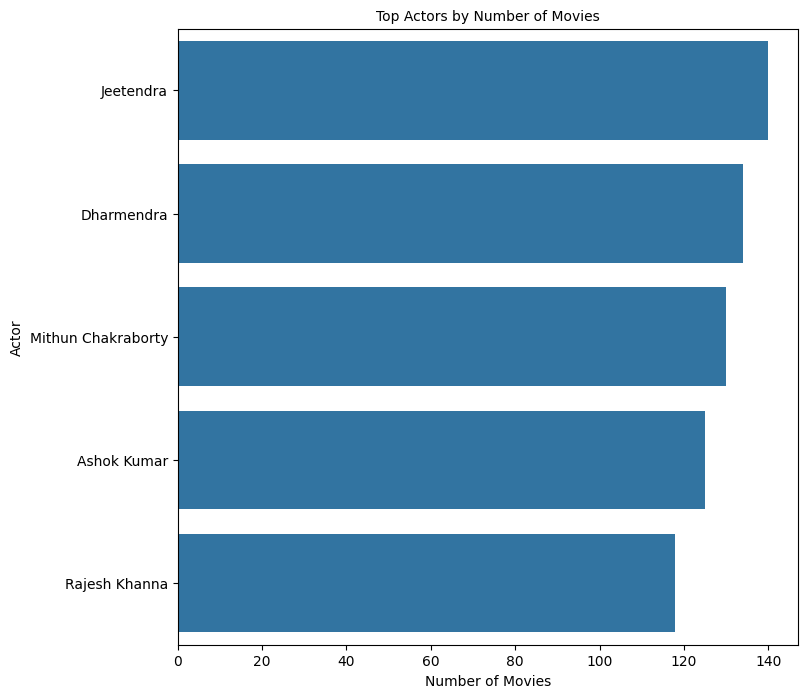

In [67]:
plt.figure(figsize=(8, 8))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h')

# Set plot labels and title
plt.title('Top Actors by Number of Movies', fontsize=10)
plt.xlabel('Number of Movies', fontsize=10)
plt.ylabel('Actor', fontsize=10)

# Show the plot
plt.show()

**Relationship between the number of votes and movie ratings**

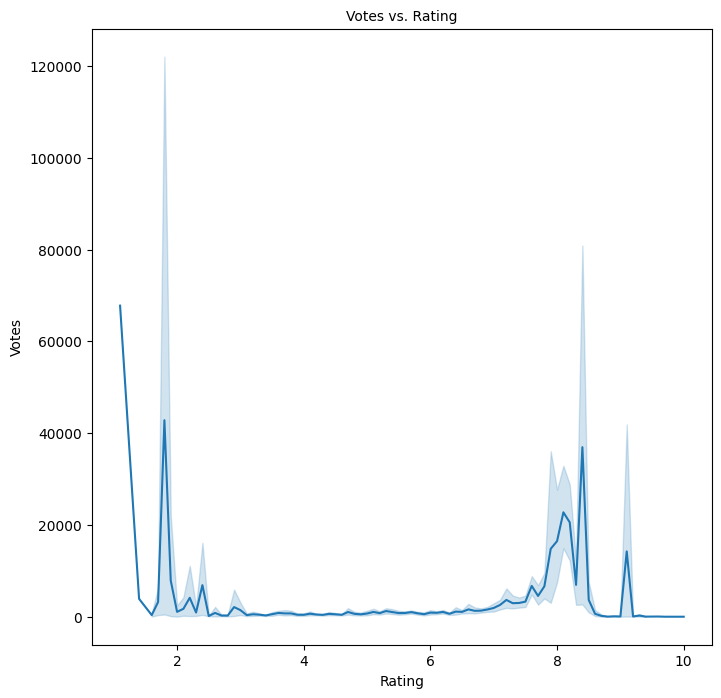

In [69]:
plt.figure(figsize=(8, 8))
sns.lineplot(data=data, x='Rating', y='Votes')

plt.title('Votes vs. Rating', fontsize=10)
plt.xlabel('Rating', fontsize=10)
plt.ylabel('Votes', fontsize=10)

plt.show()

**Distribution of Number of movies each genre**

In [70]:

data['Genre'] =data['Genre'].str.split(',')

# Create a new DataFrame with one row for each genre
genre_df =data.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,135.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


<ipython-input-75-b120152dbfef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')


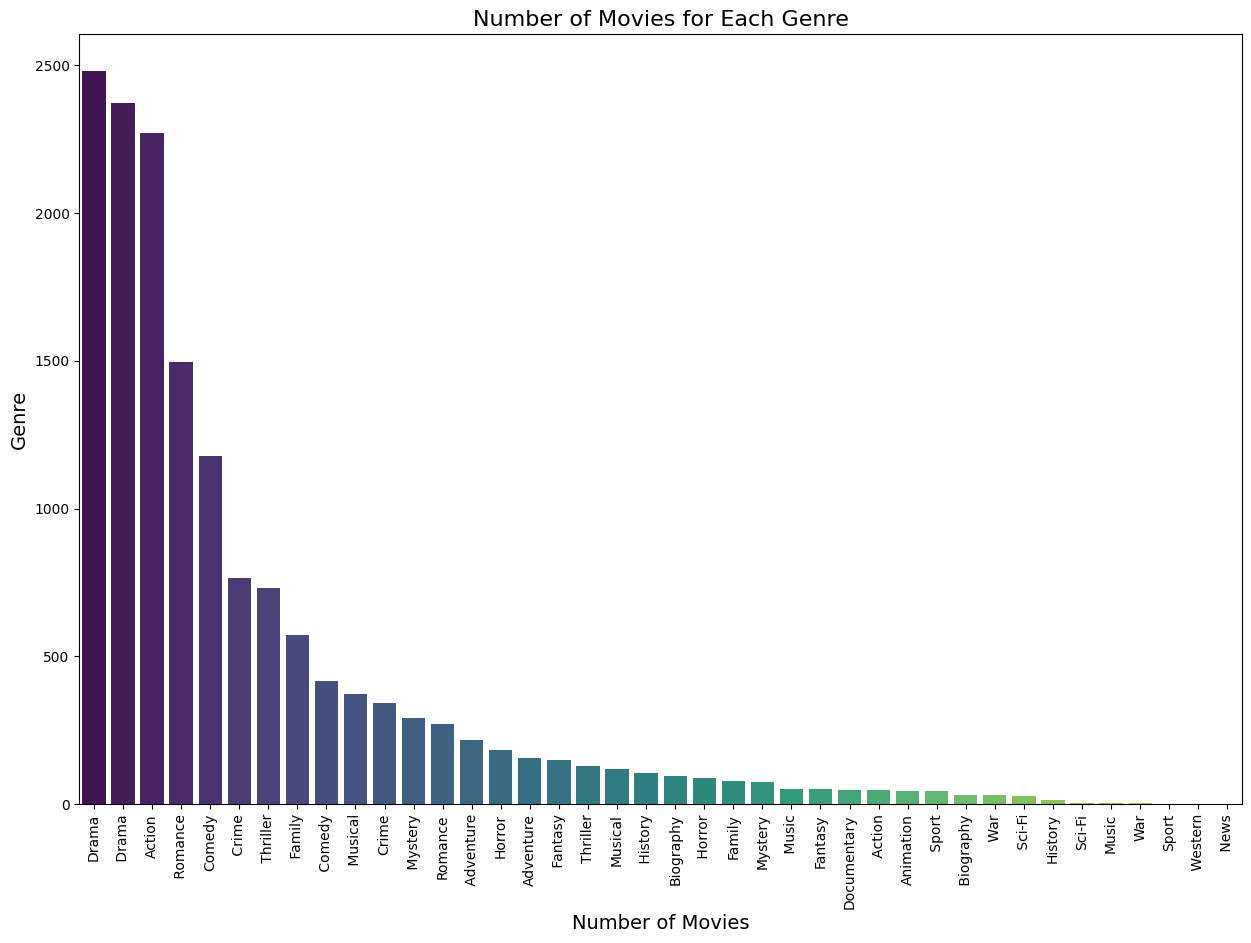

In [75]:
plt.figure(figsize=(15, 10))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')

plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=90)

plt.show()

**Training the Model using Logistic Regression**

In [76]:

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = data.drop(['Name'],axis=1)
# Transform Director columns
trans_data['Director'] = labelencoder.fit_transform(data['Director'])

# Transform Actors Columns
trans_data['Actor 1'] = labelencoder.fit_transform(data['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(data['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(data['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(data['Genre'].apply(lambda x: ', '.join(x)))

trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,252,7.0,8,755,1686,2725,373
3,2019,110,205,4.4,35,1637,1500,865,2543
5,1997,147,175,4.7,827,1881,481,84,2422
6,2005,142,315,7.4,1086,2486,878,1346,2996
8,2012,82,351,5.6,326,161,2385,1416,1189


In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)

sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.607229,0.662921,0.000005,0.255499,0.698426,0.979511,0.123102
1,0.980769,0.296667,0.493976,0.370787,0.000051,0.553976,0.621375,0.310927,0.839274
2,0.769231,0.420000,0.421687,0.404494,0.001390,0.636548,0.199254,0.030194,0.799340
3,0.846154,0.403333,0.759036,0.707865,0.001828,0.841286,0.363712,0.483825,0.988779
4,0.913462,0.203333,0.845783,0.505618,0.000543,0.054484,0.987987,0.508986,0.392409


**Correlation of Data**

In [78]:
# correlation
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Votes       0.134655
Genre       0.122565
Actor 2     0.038852
Actor 3     0.031550
Actor 1     0.025089
Director   -0.003678
Year       -0.194990
Name: Rating, dtype: float64

<Axes: >

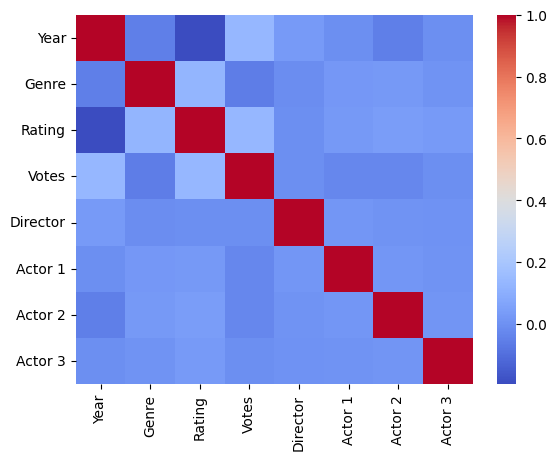

In [79]:
sns.heatmap(corr_df,annot=False,cmap="coolwarm")

**MODEL BUILDING**

In [80]:
# Import modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [81]:
# put data except Rating data
X = trans_data.drop(['Rating'],axis=1)

# Put only Rating data
y = trans_data['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [82]:
X_test = np.array(X_test)

In [83]:
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.38173569, 6.27438422, 6.24148256, ..., 5.6990634 , 6.25823896,
       6.09526622])

In [84]:
print('R2 score: ',r2_score(y_test,y_pred))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

R2 score:  0.08483347672034791
Mean squared error:  1.6972873264362003
Mean absolute error:  1.0286370452288052


In [88]:
print(X_test)

[[1969 '104 ' 234 ... 1610 1447 2657]
 [1975 '118 ' 306 ... 1667 1940 110]
 [1974 '133 ' 265 ... 1973 1185 2657]
 ...
 [2015 '95 ' 346 ... 383 292 2734]
 [1949 135.0 5 ... 173 2310 2588]
 [1958 '173 ' 201 ... 360 1191 286]]
